# Joint Move

In [139]:
import numpy as np
from numpy import dot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sin,cos,pi,radians,atan2,atan,sqrt,asin,acos

## inverse kinematics
input: Cartesian point (n, o, a, p)

In [140]:
A = np.array([[ 0,   1,   0,   0.20 ], 
              [-1,   0,   0,   0.30 ],
              [ 0,   0,   1,   0.20 ]])
Cartesian_point = A.copy()

#restrict of the corresponding_joint_variables
def check_output(var_array):
  var_range=[160,125,135,140,100,260]
  for i in range(var_array.size):
    if var_array[i]>var_range[i] or var_array[i]<-var_range[i]:
      print('!!!  θ',i+1,'  is out od range  !!!')

f11=Cartesian_point[0][0]
f12=Cartesian_point[0][1]
f13=Cartesian_point[0][2]
px=Cartesian_point[0][3]

f21=Cartesian_point[1][0]
f22=Cartesian_point[1][1]
f23=Cartesian_point[1][2]
py=Cartesian_point[1][3]

f31=Cartesian_point[2][0]
f32=Cartesian_point[2][1]
f33=Cartesian_point[2][2]
pz=Cartesian_point[2][3]

#setting
d=[0,0,0.149,0.433,0,0]
a=[0,0.432,-0.02,0,0,0]
alpha=[-0.5*pi, 0, 0.5*pi, -0.5*pi, 0.5*pi, 0]

# 8 solutions totally
for c1 in range(2):#2 solutions of theta1
  for c3 in range(2):#2 solutions of theta3
    for c5 in range(2):#2 solutions of theta5
      d3=d[3-1]
      if c1==0:
        cta1=atan2(py,px)-atan2(d3, sqrt(px**2+py**2-d3**2))
      else:
        cta1=atan2(py,px)-atan2(d3, -sqrt(px**2+py**2-d3**2))


      a2=a[2-1]
      a3=a[3-1]
      d3=d[3-1]
      d4=d[4-1]
      M=(px**2+py**2+pz**2-a2**2-a3**2-d3**2-d4**2)/(2*a2)
      if c3==0:
        cta3=atan2(M,sqrt(a3**2+d4**2-M**2))-atan2(a3,d4)
      else:
        cta3=atan2(M,-sqrt(a3**2+d4**2-M**2))-atan2(a3,d4)



      TMP=np.array([[cos(cta1)*px+sin(cta1)*py,-pz],[pz,cos(cta1)*px+sin(cta1)*py]])
      TMP_inv=np.linalg.inv(TMP)
      matrix23=np.dot(TMP_inv, np.array([[a3+a2*cos(cta3)],[d4+a2*sin(cta3)]]))
      cta23=atan2(matrix23[1],matrix23[0])
      cta2=cta23-cta3
 


      if c5==0:
        cta5=acos( cos(cta1)*sin(cta23)*f13+sin(cta1)*sin(cta23)*f23+cos(cta23)*f33 )
      else:
        cta5=-acos(cos(cta1)*sin(cta23)*f13+sin(cta1)*sin(cta23)*f23+cos(cta23)*f33)
 


      c4s5 = cos(cta1)*cos(cta23)*f13 + sin(cta1)*cos(cta23)*f23 - sin(cta23)*f33;
      s4s5 = -sin(cta1)*f13 + cos(cta1)*f23;
      s5c6 = -1*(cos(cta1)*sin(cta23)*f11+sin(cta1)*sin(cta23)*f21+cos(cta23)*f31);
      s5s6 = (cos(cta1)*sin(cta23)*f12+sin(cta1)*sin(cta23)*f22+cos(cta23)*f32);
      cta4 = atan2(s4s5, c4s5);
      cta6 = atan2(s5s6, s5c6);
      if cta5<0:
        if cta4>=0:cta4=cta4-pi 
        else :cta4=cta4+pi 
        if cta6>=0:cta6=cta6-pi 
        else :cta6=cta6+pi 





      corresponding_joint_variables=np.array([cta1,cta2,cta3,cta4,cta5,cta6])*180/pi 
      np.set_printoptions(precision=4)
      print("corresponding_joint_variables=",corresponding_joint_variables)
      check_output(corresponding_joint_variables)
      print('---------------------------------------------------------------------------------------------------------')

corresponding_joint_variables= [  31.9007   32.475   -34.6102    0.        2.1352 -121.9007]
---------------------------------------------------------------------------------------------------------
corresponding_joint_variables= [  31.9007   32.475   -34.6102 -180.       -2.1352   58.0993]
!!!  θ 4   is out od range  !!!
---------------------------------------------------------------------------------------------------------
corresponding_joint_variables= [  31.9007  264.8299 -140.1007  180.      124.7292   58.0993]
!!!  θ 2   is out od range  !!!
!!!  θ 3   is out od range  !!!
!!!  θ 4   is out od range  !!!
!!!  θ 5   is out od range  !!!
---------------------------------------------------------------------------------------------------------
corresponding_joint_variables= [  31.9007  264.8299 -140.1007    0.     -124.7292 -121.9007]
!!!  θ 2   is out od range  !!!
!!!  θ 3   is out od range  !!!
!!!  θ 5   is out od range  !!!
------------------------------------------------------

## Joint Value, Velocity, Acceleration

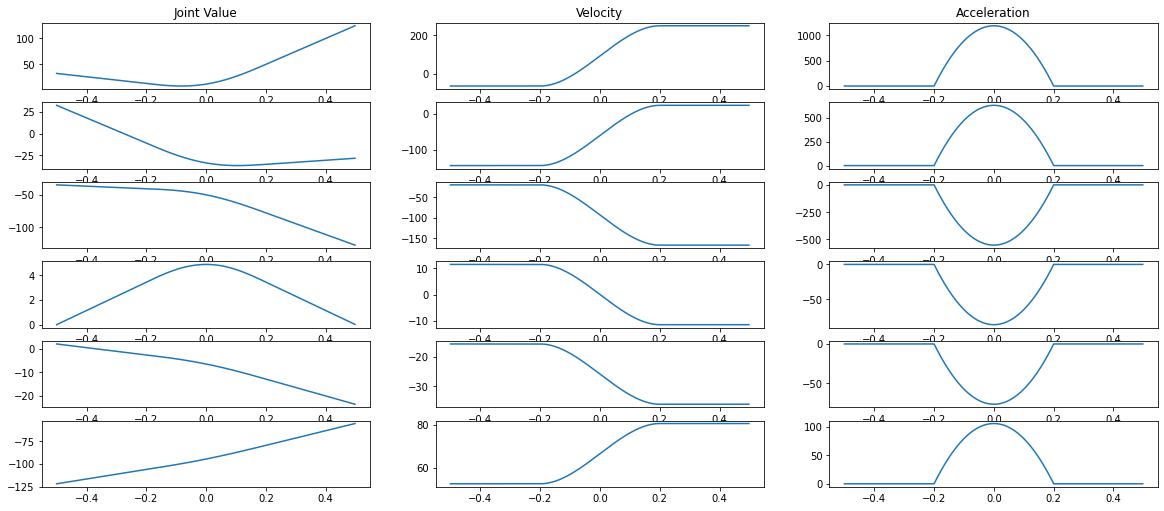

In [141]:
A = np.array([[ 0,   1,   0,   0.20 ], 
              [-1,   0,   0,   0.30 ],
              [ 0,   0,   1,   0.20 ]])
B = np.array([[ 0,   0,  -1,  -0.10 ],  
              [-1,   0,   0,   0.15 ],  
              [ 0,   1,   0,   0.30 ]])  
C = np.array([[ 1,   0,   0,  -0.25 ], 
              [ 0,  -1,   0,   0.10 ],  
              [ 0,   0,  -1,  -0.20 ]])

# by inverse kinematics
thetaA = np.array([31.9007,    32.4750,  -34.6102,         0,    2.1352, -121.9007])
thetaB = np.array([-0.5687,   -39.9083,  -44.4259,    5.7417,   -5.6942,  -95.7135])
thetaC = np.array([124.5999,  -28.2193, -127.9886,         0,  -23.7921,  -55.4001])

tacc = 0.2
T = 0.5
r = float((T-tacc)/T)
#find the point at which start to accelerate 
thetaAp = thetaA + (thetaB-thetaA)*r

#calculate deltaB and deltaC
deltaC = thetaC-thetaB
deltaB = thetaAp-thetaB

#start motion from A to C pass nearby B and find their z-axis
sampling_rate = 0.002
for t_ in range(int(-0.5/sampling_rate),int(0.5/sampling_rate),1):
  t = float(t_*sampling_rate) 
  if t < -0.2 :
    if t_==int(-0.5/sampling_rate):
      theta_p = (thetaB-thetaA)*((t+0.5)/T) + thetaA
      theta_v = (thetaB-thetaA)/T
      theta_a = np.zeros(6) 
    else:
      theta_p = np.vstack((theta_p, (thetaB-thetaA)*((t+0.5)/T) + thetaA))
      theta_v = np.vstack((theta_v, (thetaB-thetaA)/T))
      theta_a = np.vstack((theta_a ,np.zeros(6) ))
  elif t > 0.2 :
    theta_p = np.vstack((theta_p ,deltaC*t/T+thetaB))
    theta_v = np.vstack((theta_v ,deltaC/T))
    theta_a = np.vstack((theta_a ,np.zeros(6) ))
  else :
    h = float((t+tacc)/(2*tacc))
    
    theta_p = np.vstack((theta_p, ((deltaC*tacc/T+deltaB)*(2-h)*h**2-2*deltaB)*h + deltaB + thetaB))
    theta_v = np.vstack((theta_v, ((deltaC*tacc/T+deltaB)*(1.5-h)*2*h**2-deltaB)/tacc))
    theta_a = np.vstack((theta_a, (deltaC*tacc/T+deltaB)*(1-h)*3*h/tacc**2))
  

t = [-0.5+i*sampling_rate for i in range(int( (0.5-(-0.5))/sampling_rate) )]
t1 = [-0.5+i*sampling_rate for i in range(int( (-0.2-0.002-(-0.5))/sampling_rate) )]
t2 = [-0.2+i*sampling_rate for i in range(int( (0.2-(-0.5))/sampling_rate) )]
t3 = [(0.2+0.002)+i*sampling_rate for i in range(int( (0.5-(0.2+0.002))/sampling_rate) )]


fig = plt.figure(figsize=(20,10))
for i in range(6):
  
  ax = fig.add_subplot(7,3,1+3*(i))
  ax.plot(t,theta_p[:,i])
  if i==0:
    ax.set_title('Joint Value')
  bx = fig.add_subplot(7,3,2+3*(i))
  bx.plot(t,theta_v[:,i])
  if i==0:
    bx.set_title('Velocity')
  cx = fig.add_subplot(7,3,3+3*(i))
  cx.plot(t,theta_a[:,i])
  if i==0:
    cx.set_title('Acceleration')

## forward kinematics

In [142]:
def forward_kinematic(theta_input):
  #setting
  d=[0,0,0.149,0.433,0,0]
  a=[0,0.432,-0.02,0,0,0]
  alpha=[-0.5*pi, 0, 0.5*pi, -0.5*pi, 0.5*pi, 0]
  theta=np.radians(theta_input)

  #transform matrix(frame i+1 relate to i)
  A_matrix = [ np.array([[cos(theta[i])  ,  -sin(theta[i])*cos(alpha[i])  ,  sin(theta[i])*sin(alpha[i])   ,  a[i]*cos(theta[i])  ],
                        [sin(theta[i])  ,  cos(theta[i])*cos(alpha[i])    ,  -cos(theta[i])*sin(alpha[i])  ,  a[i]*sin(theta[i])  ],
                        [0              ,  sin(alpha[i])                  ,  cos(alpha[i])                 ,  d[i]                ],
                        [0              ,  0                              ,  0                             ,  1                   ]]) for i in range(6) ]
  

  #iterate to fin the transform matrix(frame 6 relate to 1)
  Cartesian_point=np.identity(4)
  for i in range(0,6):
    Cartesian_point=np.dot(Cartesian_point,A_matrix[i])

  #Computation of the Orientation Angles and Position
  x=Cartesian_point[0][3]
  y=Cartesian_point[1][3]
  z=Cartesian_point[2][3]
  phi = atan(Cartesian_point[1][2]/Cartesian_point[0][2])+pi
  thetaa = atan((cos(phi)*Cartesian_point[0][2] + sin(phi)*Cartesian_point[1][2])/Cartesian_point[2][2])+pi
  psi = atan((-sin(phi)*Cartesian_point[0][0] + cos(phi)*Cartesian_point[1][0])/(-sin(phi)*Cartesian_point[0][1] + cos(phi)*Cartesian_point[1][1]))+pi
  output=np.array([x,y,z, phi*180/pi, thetaa*180/pi, psi*180/pi])

  return Cartesian_point

## 3D path of Joint Motion

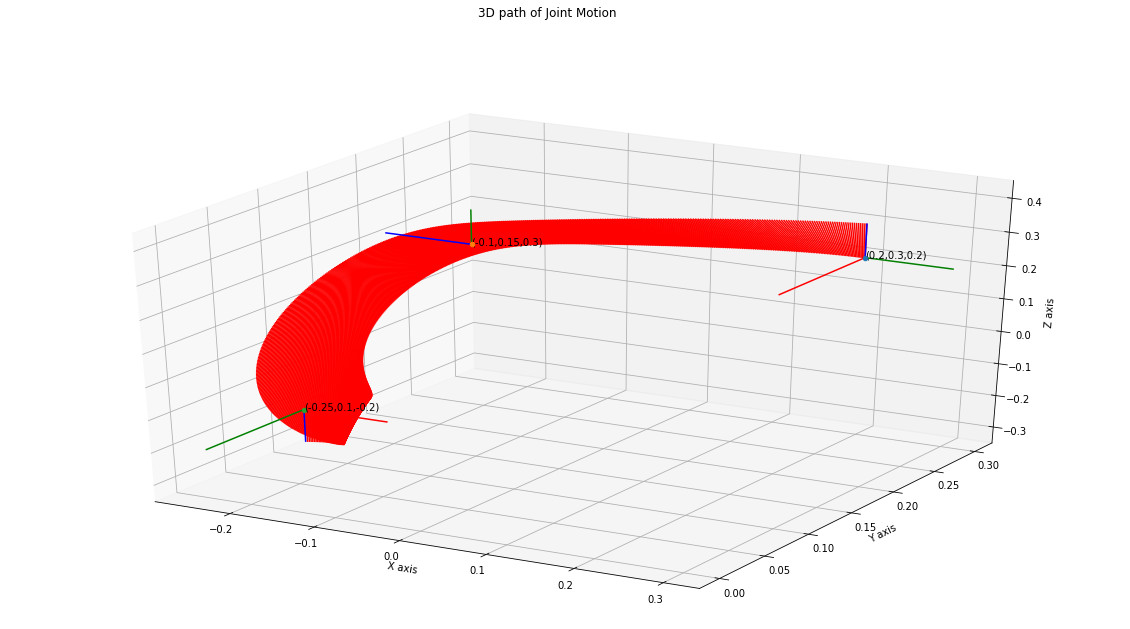

In [143]:
for i in range(np.shape(theta_p)[0]):
    T = forward_kinematic(theta_p[i])
    temp = T.dot([0,0, 0.1, 1])
    if i==0:
      p = T[0:3,3]
      zAxis = temp[0:3]
    else :
      p = np.vstack((p,T[0:3,3] ))
      zAxis = np.vstack((zAxis, temp[0:3] ))

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('3D path of Joint Motion')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.scatter(0.20,0.30,0.20)
ax.scatter(-0.10,0.15,0.30)
ax.scatter(-0.25,0.10,-0.20)
ax.text(0.20,0.30,0.20, '(0.2,0.3,0.2)')
ax.text(-0.10,0.15,0.30, '(-0.1,0.15,0.3)')
ax.text(-0.25,0.10,-0.20, '(-0.25,0.1,-0.2)')
Ax = A*[0.1, 0, 0, 1]
Ay = A*[0, 0.1, 0 ,1]
Az = A*[0, 0, 0.1, 1]
for i in range(len(zAxis)):
  ax.plot([p[i,0] ,zAxis[i,0]] , [p[i,1],zAxis[i,1]], zs=[p[i,2] ,zAxis[i,2]] ,color='r')

Ax = A.dot([0.1, 0   ,0   ,1])
Ay = A.dot([0  , 0.1 ,0   ,1])
Az = A.dot([0  , 0   ,0.1 ,1])
Bx = B.dot([0.1, 0   ,0   ,1])
By = B.dot([0  , 0.1 ,0   ,1])
Bz = B.dot([0  , 0   ,0.1 ,1])
Cx = C.dot([0.1, 0   ,0   ,1])
Cy = C.dot([0  , 0.1 ,0   ,1])
Cz = C.dot([0  , 0   ,0.1 ,1])
ax.plot([A[0,3], Ax[0]], [A[1,3] ,Ax[1]], zs=[A[2,3] ,Ax[2]] ,color='r')
ax.plot([A[0,3], Ay[0]], [A[1,3] ,Ay[1]], zs=[A[2,3] ,Ay[2]] ,color='g')
ax.plot([A[0,3], Az[0]], [A[1,3] ,Az[1]], zs=[A[2,3] ,Az[2]] ,color='b')
ax.plot([B[0,3], Bx[0]], [B[1,3] ,Bx[1]], zs=[B[2,3] ,Bx[2]] ,color='r')
ax.plot([B[0,3], By[0]], [B[1,3] ,By[1]], zs=[B[2,3] ,By[2]] ,color='g')
ax.plot([B[0,3], Bz[0]], [B[1,3] ,Bz[1]], zs=[B[2,3] ,Bz[2]] ,color='b')
ax.plot([C[0,3], Cx[0]], [C[1,3] ,Cx[1]], zs=[C[2,3] ,Cx[2]] ,color='r')
ax.plot([C[0,3], Cy[0]], [C[1,3] ,Cy[1]], zs=[C[2,3] ,Cy[2]] ,color='g')
ax.plot([C[0,3], Cz[0]], [C[1,3] ,Cz[1]], zs=[C[2,3] ,Cz[2]] ,color='b')

plt.grid(True)
plt.show()

# Cartesian Move

In [144]:
import numpy as np
from numpy import dot
from math import atan2,sin,cos,sqrt,pi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [145]:
A = np.array([[ 0,   1,   0,   20 ], 
              [-1,   0,   0,   30 ],
              [ 0,   0,   1,   20 ]])
B = np.array([[ 0,   0,  -1,  -10 ],  
              [-1,   0,   0,   15 ],  
              [ 0,   1,   0,   30 ]])  
C = np.array([[ 1,   0,   0,  -25 ], 
              [ 0,  -1,   0,   10 ],  
              [ 0,   0,  -1,  -20 ]])

nA=np.array([A[0,0],A[1,0],A[2,0]])
oA=np.array([A[0,1],A[1,1],A[2,1]])
aA=np.array([A[0,2],A[1,2],A[2,2]])
pA=np.array([A[0,3],A[1,3],A[2,3]])
nB=np.array([B[0,0],B[1,0],B[2,0]])
oB=np.array([B[0,1],B[1,1],B[2,1]])
aB=np.array([B[0,2],B[1,2],B[2,2]])
pB=np.array([B[0,3],B[1,3],B[2,3]])
nC=np.array([C[0,0],C[1,0],C[2,0]])
oC=np.array([C[0,1],C[1,1],C[2,1]])
aC=np.array([C[0,2],C[1,2],C[2,2]])
pC=np.array([C[0,3],C[1,3],C[2,3]])

r = 1
x = np.dot(nA, (pB - pA))
y = np.dot(oA, (pB - pA))
z = np.dot(aA, (pB - pA))
psi = atan2(np.dot(oA,aB), np.dot(nA, aB));
temp = sqrt(np.dot(nA, aB)**2 + np.dot(oA, aB)**2);
theta = atan2(temp, np.dot(aA, aB));
V_r_theta = 1-cos(r*theta);
sin_phi = -sin(psi)*cos(psi)*V_r_theta*np.dot(nA, nB) + (cos(psi)**2*V_r_theta+cos(theta))*np.dot(oA, nB) - sin(psi)*sin(theta)*np.dot(aA, nB);
cos_phi = -sin(psi)*cos(psi)*V_r_theta*np.dot(nA, oB) + (cos(psi)**2*V_r_theta+cos(theta))*np.dot(oA, oB) - sin(psi)*sin(theta)*np.dot(aA, oB);
phi = atan2(sin_phi, cos_phi);

sampling_rate = 0.002
tacc = 0.2

In [146]:
#從 A 到 A' 直線部分的路徑規劃 (-0.5s~-0.2s)
dataA = 0; # the index of the data of the matrix 
xA_B,yA_B,zA_B = [],[],[]
for t_ in range(int(-0.5/sampling_rate),int(-0.2/sampling_rate),1):
  t = float(t_*sampling_rate) 
  h = float((t-(-0.5))/0.5)
  dx = float(x*h)
  dy = float(y*h)
  dz = float(z*h)
  dsi = float(psi)
  dtheta = float(theta*h)
  dphi = float(phi*h)   

  S_psi=sin(psi);
  C_psi=cos(psi);
  S_theta=sin(dtheta);
  C_theta=cos(dtheta);
  V_theta=1-C_theta;
  S_phi=sin(dphi);
  C_phi=cos(dphi);
  
  #find Dr with Dr=Tr*Rar*Ror
  Tr = np.array([[1,  0,  0,  dx],
                 [0,  1,  0,  dy],
                 [0,  0,  1,  dz],
                 [0,  0,  0,  1 ]])  
  Rar = np.array([[(S_psi**2)*V_theta+C_phi, -S_psi*C_psi*V_theta    , C_psi*S_phi, 0 ],
                  [-S_psi*C_psi*V_theta    , (C_psi**2)*V_theta+C_phi, S_psi*S_phi, 0 ],
                  [-C_psi*S_phi            , -S_psi*S_phi            , C_phi      , 0 ],
                  [0                       , 0                       , 0          , 1 ]])
  Ror = np.array([[C_theta, -S_theta, 0, 0 ],
                  [S_theta, C_theta , 0, 0 ],
                  [0      , 0       , 1, 0 ],
                  [0      , 0       , 0, 1 ]])
  Dr = (Tr.dot(Rar)).dot(Ror)
  
  if t_ == int(-0.5/sampling_rate) : pA_B = np.array([A.dot(Dr)])
  else : pA_B = np.vstack((pA_B,[A.dot(Dr)]))

  xA_B.append(pA_B[dataA,0,3])
  yA_B.append(pA_B[dataA,1,3])
  zA_B.append(pA_B[dataA,2,3])

  dataA += 1

In [147]:
A2 = pA_B[-1].copy()        #A'位置
nA2 = np.array([A2[0,0],A2[1,0],A2[2,0]])
oA2 = np.array([A2[0,1],A2[1,1],A2[2,1]])
aA2 = np.array([A2[0,2],A2[1,2],A2[2,2]])
pA2 = np.array([A2[0,3],A2[1,3],A2[2,3]])
xA = (nB.T).dot((pA2-pB))
yA = (oB.T).dot((pA2-pB))
zA = (aB.T).dot((pA2-pB))
psiA = atan2((oB.T).dot(aA2),(nB.T).dot(aA2))
thetaA = atan2(sqrt(((nB.T).dot(aA2))**2+((oB.T).dot(aA2))**2), (aB.T).dot(aA2))
SphiA = -sin(psiA)*cos(psiA)*(1-cos(thetaA))*((nB.T).dot(nA2))+((cos(psiA))**2*(1-cos(thetaA))+cos(thetaA))*((oB.T).dot(nA2))-sin(psiA)*sin(thetaA)*((aB.T).dot(nA2))
CphiA = -sin(psiA)*cos(psiA)*(1-cos(thetaA))*((nB.T).dot(oA2))+((cos(psiA))**2*(1-cos(thetaA))+cos(thetaA))*((oB.T).dot(oA2))-sin(psiA)*sin(thetaA)*((aB.T).dot(oA2))
phiA=atan2(SphiA,CphiA);

xC = (nB.T).dot((pC-pB))
yC = (oB.T).dot((pC-pB))
zC = (aB.T).dot((pC-pB))
psiC = atan2((oB.T).dot(aC),(nB.T).dot(aC))
thetaC = atan2(sqrt(((nB.T).dot(aC))**2+((oB.T).dot(aC))**2),(aB.T).dot(aC))
SphiC = -sin(psiC)*cos(psiC)*(1-cos(thetaC))*((nB.T).dot(nC))+((cos(psiC))**2*(1-cos(thetaC))+cos(thetaC))*((oB.T).dot(nC))-sin(psiC)*sin(thetaC)*((aB.T).dot(nC))
CphiC = -sin(psiC)*cos(psiC)*(1-cos(thetaC))*((nB.T).dot(oC))+((cos(psiC))**2*(1-cos(thetaC))+cos(thetaC))*((oB.T).dot(oC))-sin(psiC)*sin(thetaC)*((aB.T).dot(oC))
phiC = atan2(SphiC,CphiC)

if abs(psiC-psiA)>pi/2:
    psiA = psiA+pi
    thetaA = -thetaA


dataB = 0 
x_B,y_B,z_B = [],[],[]
#從 A' 到 C' 曲線部分的路徑規劃 (-0.2s~0.2s)
for t_ in range(int(-0.2/sampling_rate),int(0.2/sampling_rate),1):
  t = float(t_*sampling_rate) 
  h = float((t+tacc)/(2*tacc))
  dx_B = float(((xC*0.2/0.5+xA)*(2-h)*h**2-2*xA)*h+xA )
  dy_B = float(((yC*0.2/0.5+yA)*(2-h)*h**2-2*yA)*h+yA )
  dz_B = float(((zC*0.2/0.5+zA)*(2-h)*h**2-2*zA)*h+zA )
  dpsi_B = float((psiC-psiA)*h+psiA)
  dtheta_B = float(((thetaC*0.2/0.5+thetaA)*(2-h)*h**2-2*thetaA)*h+thetaA)
  dphi_B = float(((phiC*0.2/0.5+phiA)*(2-h)*h**2-2*phiA)*h+phiA)

  S_psi=sin(dpsi_B)
  C_psi=cos(dpsi_B)
  S_theta=sin(dtheta_B)
  C_theta=cos(dtheta_B)
  V_theta=1-C_theta
  S_phi=sin(dphi_B)
  C_phi=cos(dphi_B)
  
  Tr = np.array([[1, 0, 0, dx_B ],
                 [0, 1, 0, dy_B ],
                 [0, 0, 1, dz_B ],
                 [0, 0, 0, 1    ]])
  Rar = np.array([[S_psi**2*V_theta+C_phi, -S_psi*C_psi*V_theta   , C_psi*S_phi, 0 ],
                  [-S_psi*C_psi*V_theta  , C_psi**2*V_theta+C_phi , S_psi*S_phi, 0 ],
                  [-C_psi*S_phi          , -S_psi*S_phi           , C_phi      , 0 ],
                  [0                     , 0                      , 0          , 1 ]])
  Ror = np.array([[C_theta, -S_theta, 0, 0 ],
                  [S_theta, C_theta , 0, 0 ],
                  [0      , 0       , 1, 0 ],
                  [0      , 0       , 0, 1 ]])

  Dr_B = (Tr.dot(Rar)).dot(Ror)                   
  if t_ == int(-0.2/sampling_rate) : p_B = np.array([B.dot(Dr_B)])
  else : p_B = np.vstack((p_B,[B.dot(Dr_B)]))
  x_B.append(p_B[dataB,0,3])
  y_B.append(p_B[dataB,1,3])
  z_B.append(p_B[dataB,2,3])
  
  dataB += 1


In [148]:
#從 C' 到 C 直線部分的路徑規劃 (0.2s~0.5s)
dataC = 0                                   
x_C,y_C,z_C = [],[],[]
for t_ in range(int(0.2/sampling_rate),int(0.5/sampling_rate),1):
  t = float(t_*sampling_rate) 
  h = float(t/0.5)
  dx_C = float(xC*h)
  dy_C = float(yC*h)
  dz_C = float(zC*h)
  dpsi_C = float(psiC)
  dtheta_C = float(thetaC*h)
  dphi_C = float(phiC*h)

  S_psi=sin(dpsi_C)
  C_psi=cos(dpsi_C)
  S_theta=sin(dtheta_C)
  C_theta=cos(dtheta_C)
  V_theta=1-C_theta
  S_phi=sin(dphi_C)
  C_phi=cos(dphi_C)

  
  # % find Dr with Dr=Tr*Rar*Ror    
  Tr = np.array([[1, 0, 0, dx_C ],
                 [0, 1, 0, dy_C ],
                 [0, 0, 1, dz_C ],
                 [0, 0, 0, 1    ]])
  Rar = np.array([[(S_psi**2)*V_theta+C_phi, -S_psi*C_psi*V_theta     , C_psi*S_phi, 0 ],
                  [-S_psi*C_psi*V_theta  , (C_psi**2)*V_theta+C_phi   , S_psi*S_phi, 0 ],
                  [-C_psi*S_phi          , -S_psi*S_phi             , C_phi      , 0 ],
                  [0                     , 0                        , 0          , 1 ]])
  Ror = np.array([[C_theta, -S_theta, 0, 0 ],
                  [S_theta, C_theta , 0, 0 ],
                  [0      , 0       , 1, 0 ],
                  [0      , 0       , 0, 1]])
  

  Dr_C = (Tr.dot(Rar)).dot(Ror)
  

  if t_ == int(0.2/sampling_rate) : p_C = np.array([B.dot(Dr_C)])
  else : p_C = np.vstack((p_C,[B.dot(Dr_C)]))

  x_C.append(p_C[dataC,0,3])
  y_C.append(p_C[dataC,1,3])
  z_C.append(p_C[dataC,2,3])

  dataC += 1


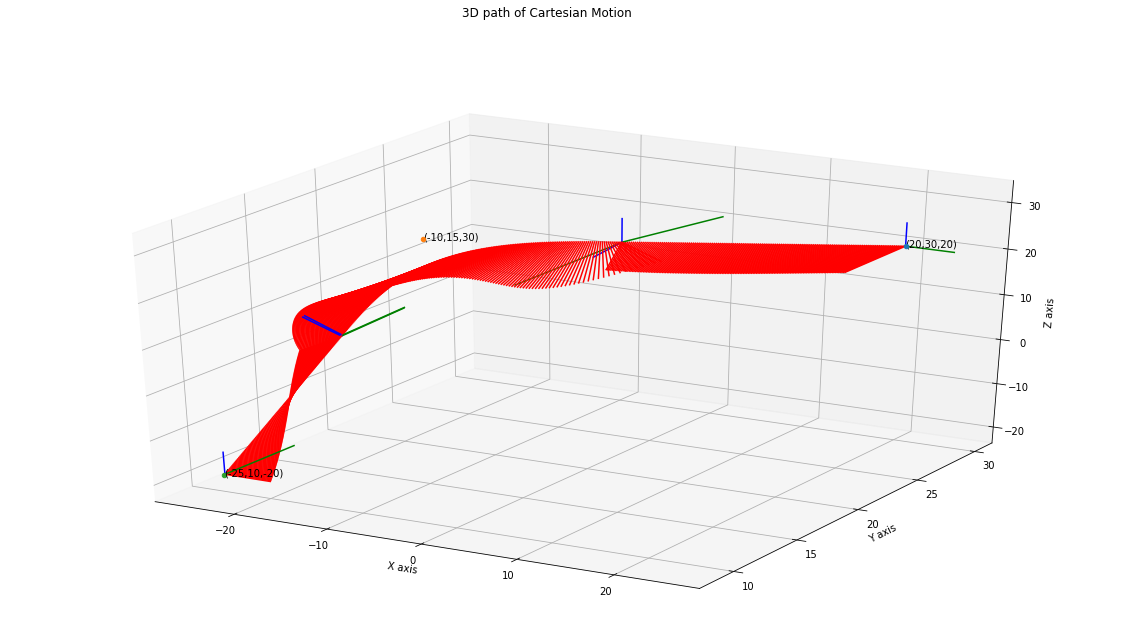

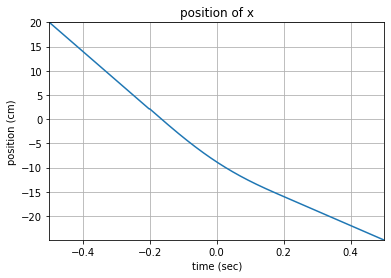

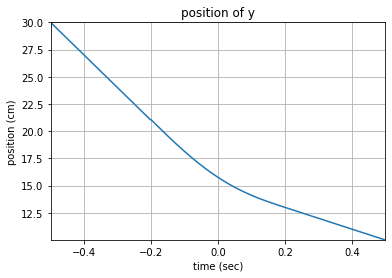

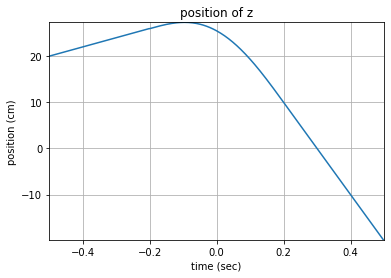

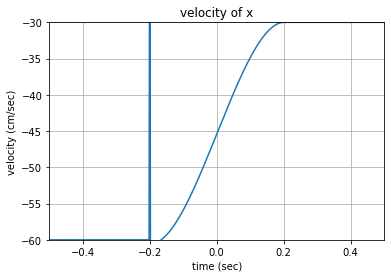

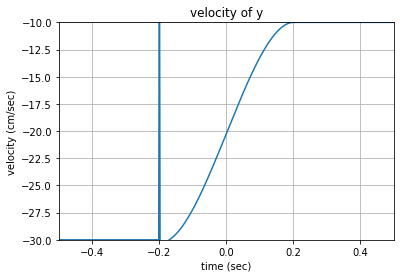

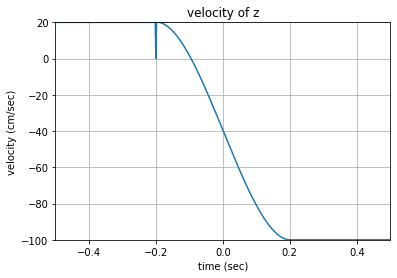

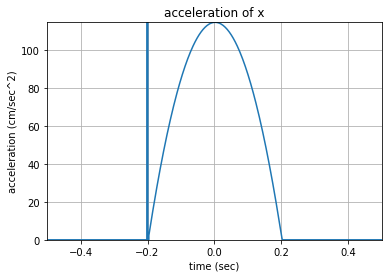

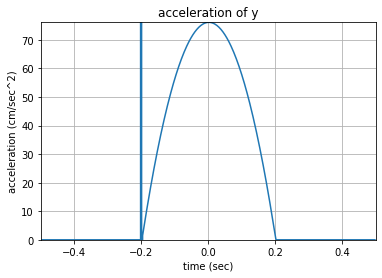

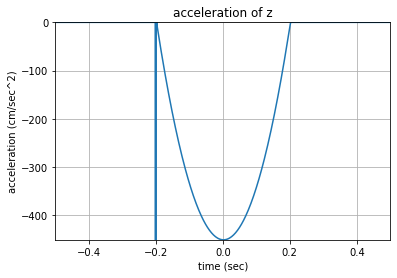

In [149]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('3D path of Cartesian Motion')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.scatter(20,30,20)
ax.scatter(-10,15,30)
ax.scatter(-25,10,-20)
ax.text(20,30,20, '(20,30,20)')
ax.text(-10,15,30, '(-10,15,30)')
ax.text(-25,10,-20, '(-25,10,-20)')
for i in range(len(pA_B)):
  if i==0 or i==(len(pA_B)-1):
    ax.plot([pA_B[i][0,3], pA_B[i][0,3]+pA_B[i][0,1]*5], [pA_B[i][1,3],pA_B[i][1,3]+pA_B[i][1,1]*5],zs=[pA_B[i][2,3],pA_B[i][2,3]+pA_B[i][2,1]*5],color='g')
    ax.plot([pA_B[i][0,3], pA_B[i][0,3]+pA_B[i][0,2]*5], [pA_B[i][1,3],pA_B[i][1,3]+pA_B[i][1,2]*5],zs=[pA_B[i][2,3],pA_B[i][2,3]+pA_B[i][2,2]*5],color='b')
  ax.plot([pA_B[i][0,3], pA_B[i][0,3]+pA_B[i][0,0]*5], [pA_B[i][1,3],pA_B[i][1,3]+pA_B[i][1,0]*5],zs=[pA_B[i][2,3],pA_B[i][2,3]+pA_B[i][2,0]*5],color='r')

for i in range(len(p_B)):
  if i==0 or i==(len(p_B)-1):
    ax.plot([p_B[i][0,3], p_B[i][0,3]+p_B[i][0,1]*5], [p_B[i][1,3],p_B[i][1,3]+p_B[i][1,1]*5],zs=[p_B[i][2,3],p_B[i][2,3]+p_B[i][2,1]*5],color='g')
    ax.plot([p_B[i][0,3], p_B[i][0,3]+p_B[i][0,2]*5], [p_B[i][1,3],p_B[i][1,3]+p_B[i][1,2]*5],zs=[p_B[i][2,3],p_B[i][2,3]+p_B[i][2,2]*5],color='b')
  ax.plot([p_B[i][0,3], p_B[i][0,3]+p_B[i][0,0]*5], [p_B[i][1,3],p_B[i][1,3]+p_B[i][1,0]*5],zs=[p_B[i][2,3],p_B[i][2,3]+p_B[i][2,0]*5],color='r')

for i in range(len(p_C)):
  if i==0 or i==(len(p_C)-1):
    ax.plot([p_C[i][0,3], p_C[i][0,3]+p_C[i][0,1]*5], [p_C[i][1,3],p_C[i][1,3]+p_C[i][1,1]*5],zs=[p_C[i][2,3],p_C[i][2,3]+p_C[i][2,1]*5],color='g')
    ax.plot([p_C[i][0,3], p_C[i][0,3]+p_C[i][0,2]*5], [p_C[i][1,3],p_C[i][1,3]+p_C[i][1,2]*5],zs=[p_C[i][2,3],p_C[i][2,3]+p_C[i][2,2]*5],color='b')
  ax.plot([p_C[i][0,3], p_C[i][0,3]+p_C[i][0,0]*5], [p_C[i][1,3],p_C[i][1,3]+p_C[i][1,0]*5],zs=[p_C[i][2,3],p_C[i][2,3]+p_C[i][2,0]*5],color='r')

plt.grid(True)
plt.show()




X = np.concatenate((xA_B, x_B ,x_C))
Y = np.concatenate((yA_B, y_B ,y_C))
Z = np.concatenate((zA_B, z_B ,z_C))
t = [-0.5+i*sampling_rate for i in range(len(X))]


plt.plot(t,X)
plt.xlim(-0.5,0.5)
plt.ylim(X.min(),X.max())
plt.title('position of x')
plt.xlabel('time (sec)')
plt.ylabel('position (cm)')
plt.grid(True)
plt.show()


plt.plot(t,Y)
plt.xlim(-0.5,0.5)
plt.ylim(Y.min(),Y.max())
plt.title('position of y')
plt.xlabel('time (sec)')
plt.ylabel('position (cm)')
plt.grid(True)
plt.show()

plt.plot(t,Z)
plt.xlim(-0.5,0.5)
plt.ylim(Z.min(),Z.max())
plt.title('position of z')
plt.xlabel('time (sec)')
plt.ylabel('position (cm)')
plt.grid(True)
plt.show()


dX = np.diff(X)/sampling_rate
dY = np.diff(Y)/sampling_rate
dZ = np.diff(Z)/sampling_rate
dt = [-0.5+i*sampling_rate for i in range(1,len(X))]


plt.plot(dt,dX)
plt.xlim(-0.5,0.5)
plt.ylim(-60,-30)
plt.title('velocity of x')
plt.xlabel('time (sec)')
plt.ylabel('velocity (cm/sec)')
plt.grid(True)
plt.show()

plt.plot(dt,dY)
plt.xlim(-0.5,0.5)
plt.ylim(-30,-10)
plt.title('velocity of y')
plt.xlabel('time (sec)')
plt.ylabel('velocity (cm/sec)')
plt.grid(True)
plt.show()

plt.plot(dt,dZ)
plt.xlim(-0.5,0.5)
plt.ylim(-100,dZ[0])
plt.title('velocity of z')
plt.xlabel('time (sec)')
plt.ylabel('velocity (cm/sec)')
plt.grid(True)
plt.show()



ddX = np.diff(dX)/sampling_rate;
ddY = np.diff(dY)/sampling_rate;
ddZ = np.diff(dZ)/sampling_rate;
ddt = [-0.5+i*sampling_rate for i in range(2,len(X))]

plt.plot(ddt,ddX)
plt.xlim(-0.5,0.5)
plt.ylim(0,ddX[int(1/(2*sampling_rate))])
plt.title('acceleration of x')
plt.xlabel('time (sec)')
plt.ylabel('acceleration (cm/sec^2)')
plt.grid(True)
plt.show()

plt.plot(ddt,ddY)
plt.xlim(-0.5,0.5)
plt.ylim(0,ddY[int(1/(2*sampling_rate))])
plt.title('acceleration of y')
plt.xlabel('time (sec)')
plt.ylabel('acceleration (cm/sec^2)')
plt.grid(True)
plt.show()

plt.plot(ddt,ddZ)
plt.xlim(-0.5,0.5)
plt.ylim(ddZ[int(1/(2*sampling_rate))],0)
plt.title('acceleration of z')
plt.xlabel('time (sec)')
plt.ylabel('acceleration (cm/sec^2)')
plt.grid(True)
plt.show()
